In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs as go
print(__version__)
init_notebook_mode(connected=True)

3.8.1


In [3]:
df = pd.read_csv('athletes.csv')

In [4]:
df.columns

Index(['id', 'age', 'gender', 'activities', 'bike', 'run', 'swim', 'other',
       '1s_critical_power', '15s_critical_power', '2m_critical_power',
       '3m_critical_power', '5m_critical_power', '8m_critical_power',
       '10m_critical_power', '20m_critical_power', '30m_critical_power',
       '1m_peak_wpk', '5m_peak_wpk', '10m_peak_wpk', '20m_peak_wpk',
       '30m_peak_wpk', '20s_peak', '20s_peak_wpk', '60s_peak', '60s_peak_wpk',
       '180s_peak', '180s_peak_wpk', '240s_peak', '240s_peak_wpk', '420s_peak',
       '420s_peak_wpk', '720s_peak', '720s_peak_wpk', 'weightkg',
       ' weightstd'],
      dtype='object')

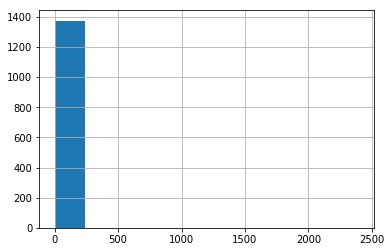

In [5]:
df[' weightstd'].hist()

# Critical power

In [6]:
_df = df[(df['20m_critical_power']<600) & (df['20m_critical_power']>100) & (df['age']>16) & (df['age']<100)]
trace = go.Scatter({'x': _df['age'],
                    'y': _df['20m_critical_power'],
                    'mode': 'markers'
                   })
data = [trace]
fig = go.Figure(data=data)
iplot(fig)

In [7]:
_df = df[(df['age']<100) & (df['age']>15)]
trace = go.Histogram({
    'x': _df['age']
})
data = [trace]
xaxis = {
    'title': 'Age'
}
layout = {
    'xaxis': xaxis,
    'title': 'Golden Cheetah Open Data (silly) Insights'
}
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [8]:
_df = df[(df['age']<80) & (df['age']>15) & (df['weightkg']<100) & (df['20m_critical_power']<600)
        & (df[' weightstd']<100) & (df['activities']>10)]
trace = go.Histogram2dContour({
    'x': _df['age'],
    'y': _df['weightkg'],
    'showscale': False
})

trace2 = go.Scatter({
    'name': 'Weight Change',
    'x': _df['age'],
    'y': _df['weightkg'],
    'mode': 'markers',
    'marker': {
        'color': 'blue',
        'size': 5*_df[' weightstd']**0.5
    }
})

data = [trace, trace2]

layout = {
    'title': 'Golden Cheetah Silly Insights <br> Weight and Weight Change vs Athlete Age',
    'yaxis': {'title': 'weight [kg]'},
    'xaxis': {'title': 'age'}
}

fig = go.Figure(data, layout)
iplot(fig)